# Chapter: Decision Trees and Ensemble Learning


# Topic: RF illustration for quadratic fitting

In [2]:
# import
import numpy as np
np.random.seed(1)

In [19]:
# generate data
x = np.linspace(-1, 1, 50)
y = x*x + 0.25 + np.random.normal(0, 0.15, (50,))

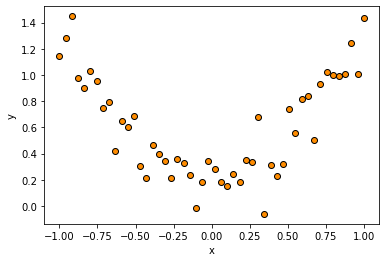

In [20]:
# plot raw data
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(x, y, edgecolor="black", c="darkorange")
plt.xlabel('x'), plt.ylabel('y')
plt.show()

In [21]:
# fit RF model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=20).fit(x[:, None], y)

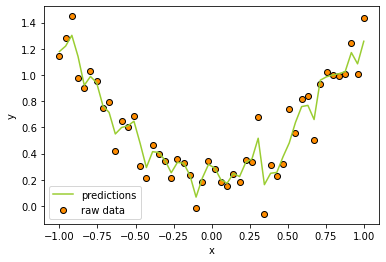

In [24]:
# predict and plot
y_pred = model.predict(x[:, None])

plt.figure()
plt.scatter(x, y, edgecolor="black", c="darkorange", label="raw data")
plt.plot(x, y_pred, 'yellowgreen', label="predictions")
plt.xlabel('x'), plt.ylabel('y')
plt.legend()
plt.show()

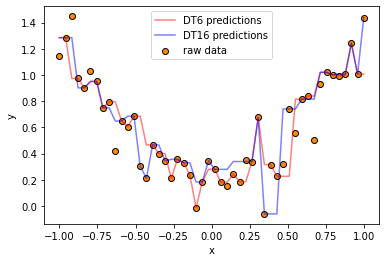

In [25]:
# get predictions from constituent trees and plot
tree_list = model.estimators_
y_pred_tree1 = tree_list[5].predict(x[:, None])
y_pred_tree2 = tree_list[15].predict(x[:, None])


plt.figure()
plt.scatter(x, y, edgecolor="black", c="darkorange", label="raw data")
plt.plot(x, y_pred_tree1, 'red', alpha=0.5, label="DT6 predictions")
plt.plot(x, y_pred_tree2, 'blue', alpha=0.5, label="DT16 predictions")
plt.xlabel('x'), plt.ylabel('y')
plt.legend()
plt.show()

In [8]:
##%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
##                  Impact of # of trees on validation error
## %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

In [26]:
# generate validation data
np.random.seed(2)

x_val = np.linspace(-1, 1, 50)
y_val = x_val*x_val + 0.25 + np.random.normal(0, 0.15, (50,))

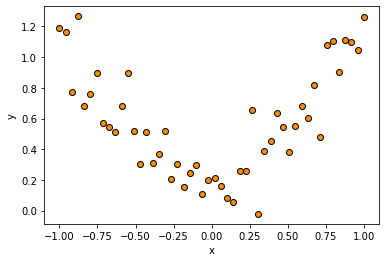

In [27]:
# plot raw validation data
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(x_val, y_val, edgecolor="black", c="darkorange")
plt.xlabel('x'), plt.ylabel('y')
plt.show()

In [28]:
# fit multiple RFs with # of trees ranging from 10 to 500
from sklearn.metrics import mean_squared_error as mse

val_errors = []
n_tree_grid = np.arange(2,250,5)
for n_tree in n_tree_grid:
    model = RandomForestRegressor(n_estimators=n_tree).fit(x[:, None], y)
    y_val_pred = model.predict(x_val[:, None])
    val_errors.append(mse(y_val, y_val_pred))

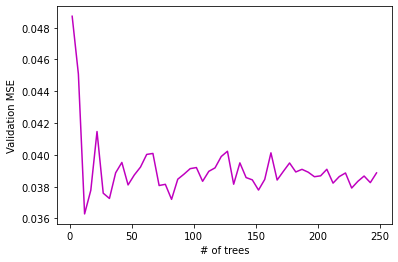

In [29]:
# plot validation errors
plt.figure()
plt.plot(n_tree_grid, val_errors, 'm')  
plt.xlabel('# of trees'), plt.ylabel('Validation MSE')
plt.show()